In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [194]:
im = pd.read_csv("Datasets/immigrants.csv", skiprows=14, nrows=215)
im.columns=['Birthplace', '1980-1990', '1991-2000', '2001-2010', '2011-2021']

In [195]:
for i in range(len(im)):
    if im['Birthplace'][i][-2:].isdigit():
        im['Birthplace'][i] = im['Birthplace'][i][0:-3]
    if im['Birthplace'][i][-1].isdigit():
        im['Birthplace'][i] = im['Birthplace'][i][0:-2]

    im['1980-1990'][i] = int(im['1980-1990'][i].replace(',', ''))
    im['1991-2000'][i] = int(im['1991-2000'][i].replace(',', ''))
    im['2001-2010'][i] = int(im['2001-2010'][i].replace(',', ''))
    im['2011-2021'][i] = int(im['2011-2021'][i].replace(',', ''))
    if im['1980-1990'][i] == 0 and im['1991-2000'][i] == 0 and im['2001-2010'][i] == 0 and im['2011-2021'][i] == 0:
        im=im.drop(labels=i)
im = im.sort_values(by=['Birthplace'])
im.reset_index(drop=True, inplace=True)
im

,Birthplace,1980-1990,1991-2000,2001-2010,2011-2021
0,Afghanistan,3920,14745,22280,21340
1,Albania,15,4130,8000,5500
2,Algeria,1345,11745,32430,32580
3,Andorra,0,0,0,30
4,Angola,415,390,1315,580
...,...,...,...,...,...
195,"Virgin Islands, United States",10,0,20,15
196,West Bank and Gaza Strip,1065,1930,2375,2620
197,Yemen,120,785,1120,2570
198,Zambia,480,685,780,845


In [196]:
gdp = pd.read_csv("Datasets/gdp.csv", skiprows=4, nrows=266, usecols=[0, 55, 65])
gdp.columns = ['Birthplace', 'GDP11', 'GDP21']
life = pd.read_csv("Datasets/life.csv", skiprows=4, usecols=[55, 64])
life.columns = ['LE11', 'LE20']
inflation = pd.read_csv("Datasets/inflation.csv", skiprows=4, usecols=[55, 63])
inflation.columns = ['IF11', 'IF19']
unemployment = pd.read_csv("Datasets/unemployment.csv", skiprows=4, usecols=[56, 64])
unemployment.columns = ['UE12', 'UE20']
health = pd.read_csv("Datasets/health.csv", skiprows=4, usecols=[55, 63])
health.columns = ['HE11', 'HE19']
education = pd.read_csv("Datasets/education.csv", skiprows=4, usecols=[55, 64])
education.columns = ['ED11', 'ED20']

In [197]:
comb = pd.concat([gdp, life, inflation, unemployment, health, education], axis=1)
comb.dropna(axis=0,subset = ['GDP11', 'GDP21', 'LE11', 'LE20', 'IF11', 'IF19', 'UE12', 'UE20', 'HE11', 'HE19', 'ED11', 'ED20'], inplace=True)
comb = comb.sort_values(by=['Birthplace'])
comb.reset_index(drop=True, inplace=True)
comb.head()
comb

,Birthplace,GDP11,GDP21,LE11,LE20,IF11,IF19,UE12,UE20,HE11,HE19,ED11,ED20
0,Afghanistan,621.912311,368.754614,61.419000,62.575000,11.804186,2.302373,1.690000,11.710000,8.561907,13.242202,3.46201,2.860859
1,Armenia,3462.681611,4966.513471,73.305000,72.173000,7.650008,1.443447,17.299999,12.180000,9.375878,11.335264,3.14385,2.705670
2,Australia,62596.432175,60443.109165,81.895122,83.200000,3.303850,1.610768,5.220000,6.460000,8.541538,9.910786,5.06995,6.100000
3,Austria,51442.276246,53637.705711,80.982927,81.192683,3.286579,1.530896,4.910000,5.200000,10.026133,10.434031,5.59227,5.070000
4,Azerbaijan,7189.691229,5387.997975,69.984000,66.868000,7.858333,2.610572,5.190000,7.160000,2.446418,4.038290,2.43564,4.332050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Upper middle income,7546.030310,10828.050694,74.458433,75.845915,5.005595,1.968230,5.092209,6.962978,5.349713,5.844136,4.22994,4.134130
93,Uruguay,14267.584306,17313.188348,76.983000,78.430000,8.092832,7.881989,6.450000,10.330000,7.948956,9.347832,4.35527,4.552070
94,Uzbekistan,2051.129515,1983.064723,69.649000,70.331000,13.779745,14.525736,4.870000,5.290000,5.143769,5.617604,6.19586,4.922790
95,Vietnam,1953.556979,3756.489121,73.692000,75.378000,18.677732,2.795824,1.030000,2.100000,4.612852,5.249656,4.81372,4.111617


In [198]:
#插补数据
import csv
import math
# file = pd.read_csv("Datasets/unemployment.csv", skiprows=4, usecols=range(35, 65)).to_numpy()
# file
#
#
# for i in file[0]:
#     if math.isnan(i):
#         print(i)


In [199]:
def increase_rate(num1, num2):
    return float(format((num2 - num1) / num1, '.3f'))

a, b, c, d, e, f, g, h = [], [], [], [], [], [], [], []
for m in range(len(comb)):
    for n in range(len(im)):
        if comb['Birthplace'][m] == im['Birthplace'][n]:
            a.append(im['Birthplace'][n])
            b.append(im['2011-2021'][n])
            c.append(increase_rate(comb['GDP11'][m], comb['GDP21'][m]))
            d.append(float(format(comb['LE20'][m] - comb['LE11'][m], '.3f')))
            e.append(increase_rate(comb['IF11'][m], comb['IF19'][m]))
            f.append(increase_rate(comb['UE12'][m], comb['UE20'][m]))
            g.append(increase_rate(comb['HE11'][m], comb['HE19'][m]))
            h.append(increase_rate(comb['ED11'][m], comb['ED20'][m]))

dataset = pd.DataFrame({'Birthplace':a, 'Immigration':b, 'GDP_Change':c, 'LE_Change':d, 'IF_Change': e, 'UE_Change': f, 'HE_Change': g, 'ED_Change': h})

nor = normalize([dataset['Immigration']])
dataset['Immigration'] = nor[0][:]
dataset.head()

,Birthplace,Immigration,GDP_Change,LE_Change,IF_Change,UE_Change,HE_Change,ED_Change
0,Afghanistan,0.051661,-0.407,1.156,-0.805,5.929,0.547,-0.174
1,Armenia,0.005132,0.434,-1.132,-0.811,-0.296,0.209,-0.139
2,Austria,0.001900,0.043,0.210,-0.534,0.059,0.041,-0.093
3,Azerbaijan,0.004612,-0.251,-3.116,-0.668,0.380,0.651,0.779
4,Belarus,0.006899,0.119,3.673,-0.895,7.100,0.202,0.057


In [200]:
dataset.dtypes

Birthplace      object
Immigration    float64
GDP_Change     float64
LE_Change      float64
IF_Change      float64
UE_Change      float64
HE_Change      float64
ED_Change      float64
dtype: object

<Axes: >

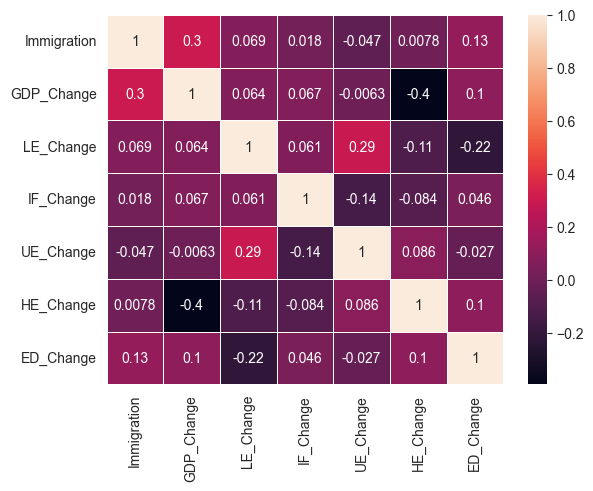

In [201]:
corr = dataset.corr(numeric_only=True)
sb.heatmap(corr, annot=True, linewidth=0.5)

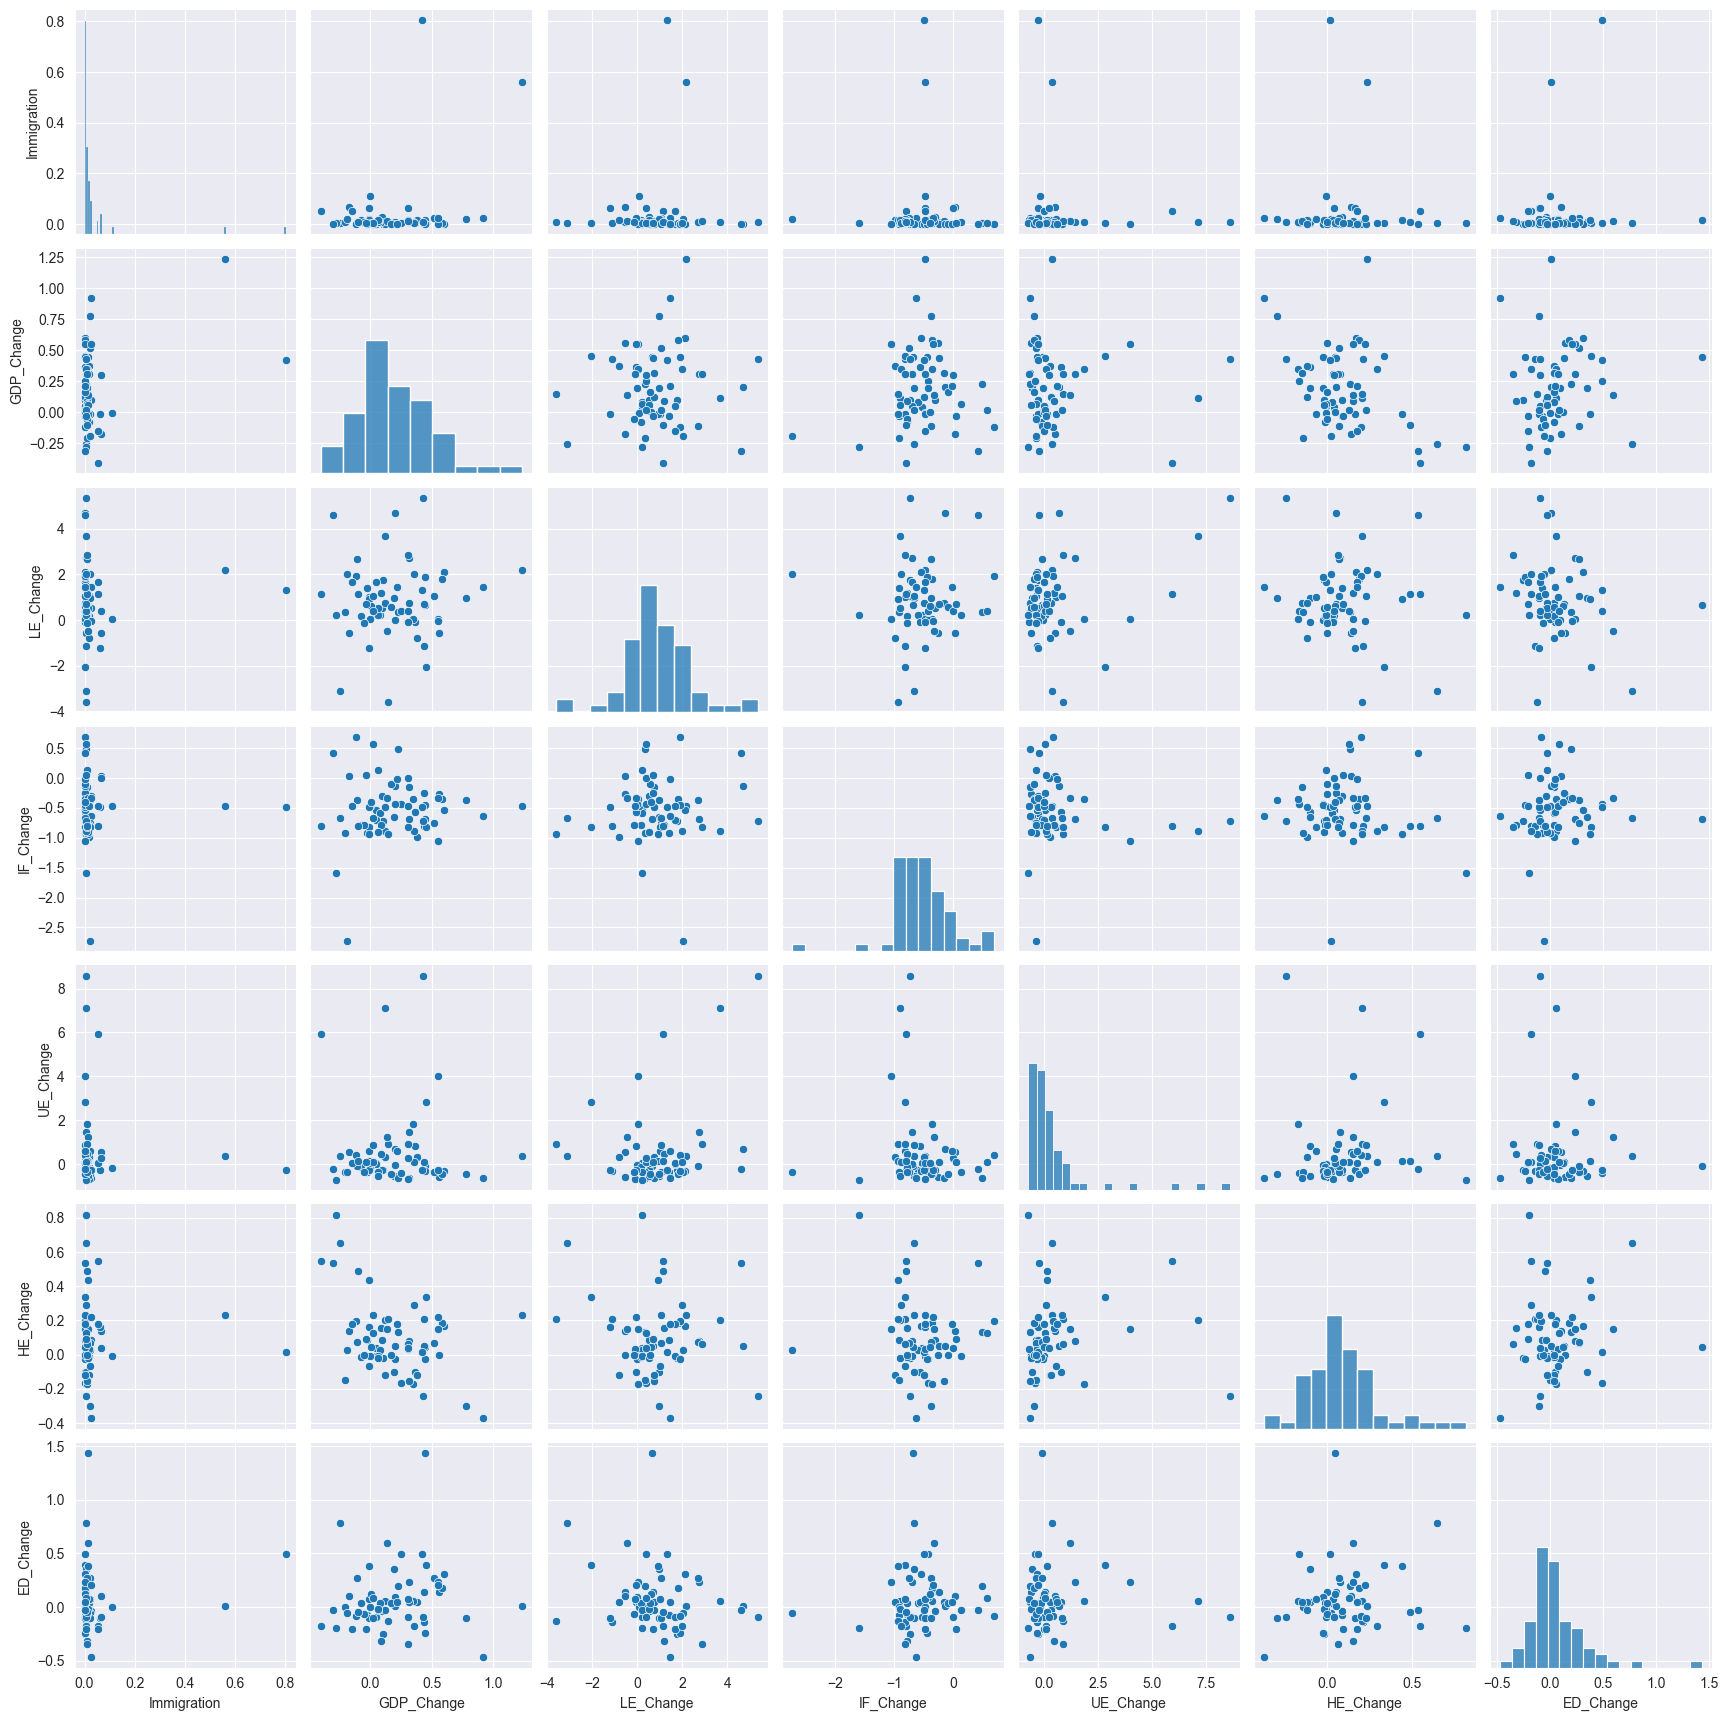

In [202]:
sb.pairplot(dataset)

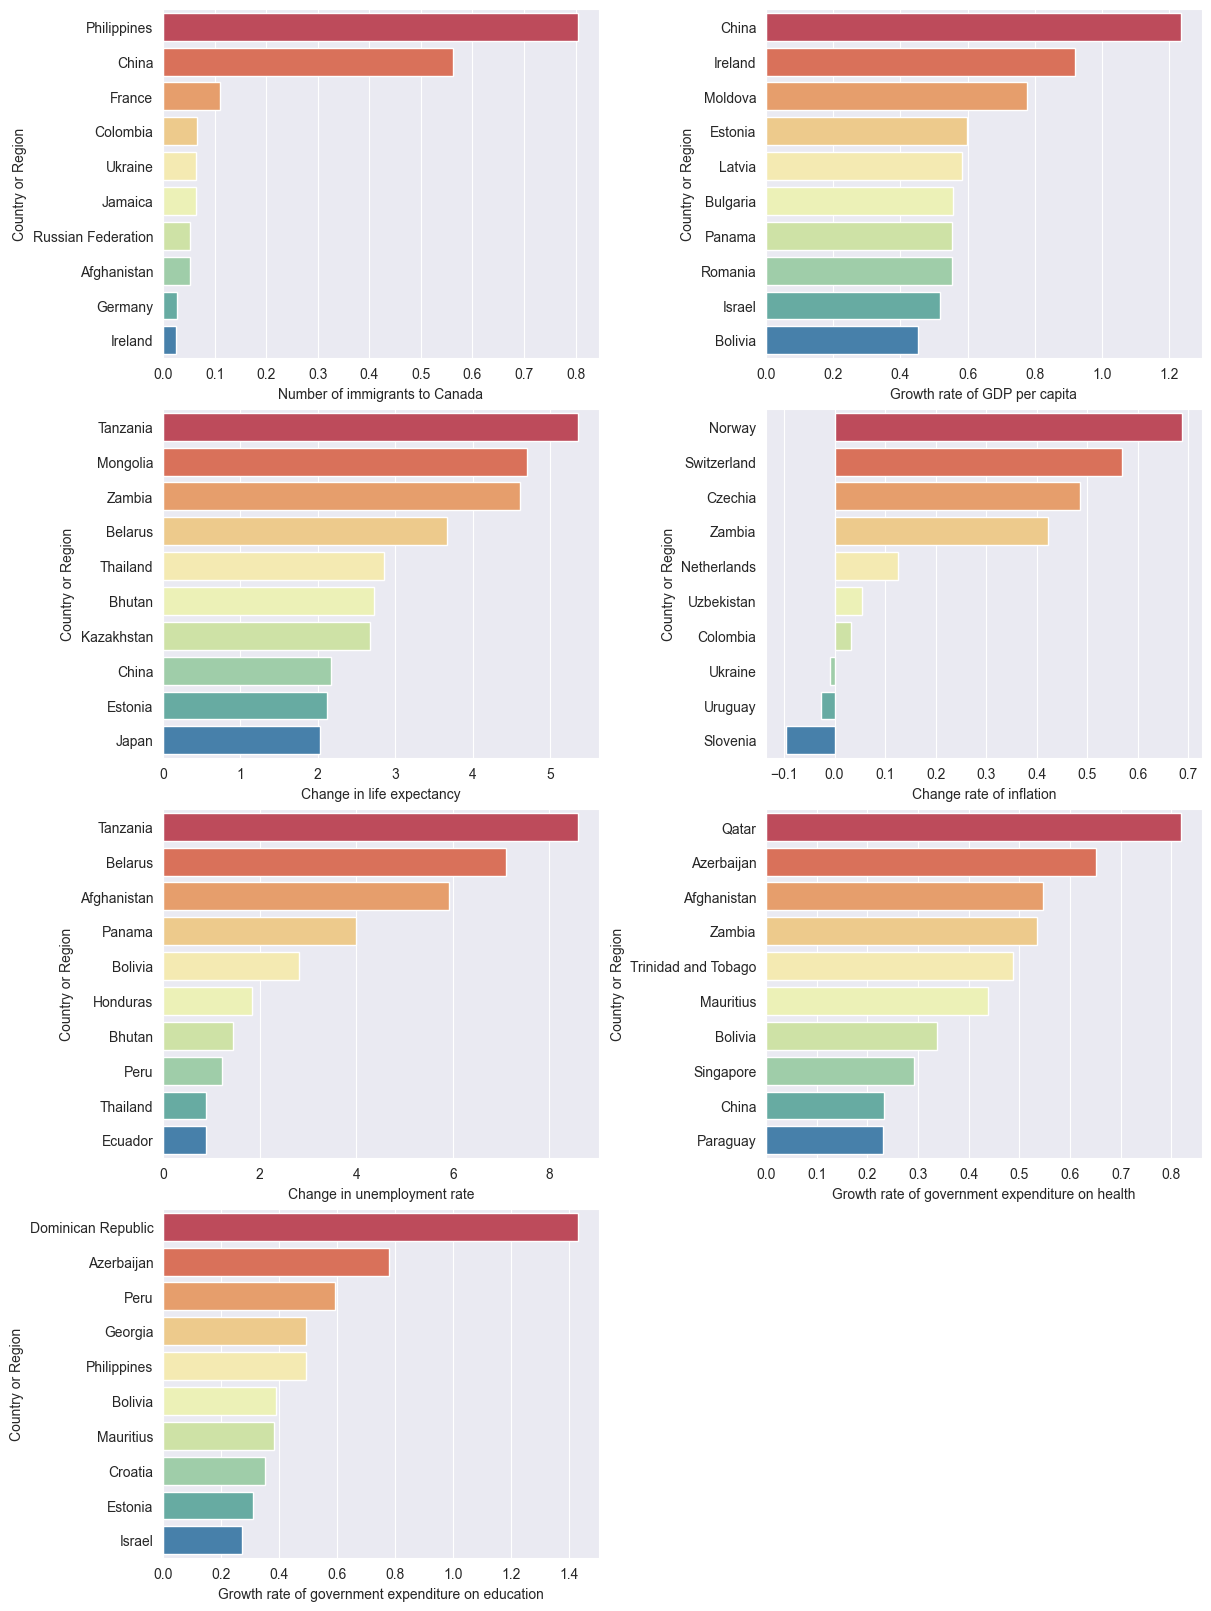

In [203]:
fig, axes = plt.subplots(nrows=4, ncols=2, constrained_layout=True, figsize=(12,16))

sb.barplot(x='Immigration', y='Birthplace', data=dataset.nlargest(10, 'Immigration'), ax=axes[0,0], palette="Spectral")\
    .set(xlabel='Number of immigrants to Canada', ylabel='Country or Region')
sb.barplot(x='GDP_Change' ,y='Birthplace', data=dataset.nlargest(10, 'GDP_Change'), ax=axes[0,1], palette="Spectral")\
    .set(xlabel='Growth rate of GDP per capita', ylabel='Country or Region')
sb.barplot(x='LE_Change',y='Birthplace', data=dataset.nlargest(10, 'LE_Change'), ax=axes[1,0], palette="Spectral")\
    .set(xlabel='Change in life expectancy', ylabel='Country or Region')
sb.barplot(x='IF_Change' ,y='Birthplace', data=dataset.nlargest(10, 'IF_Change'), ax=axes[1,1], palette="Spectral")\
    .set(xlabel='Change rate of inflation', ylabel='Country or Region')
sb.barplot(x='UE_Change',y='Birthplace', data=dataset.nlargest(10, 'UE_Change'), ax=axes[2,0], palette="Spectral")\
    .set(xlabel='Change in unemployment rate', ylabel='Country or Region')
sb.barplot(x='HE_Change' ,y='Birthplace', data=dataset.nlargest(10, 'HE_Change'), ax=axes[2,1], palette="Spectral")\
    .set(xlabel='Growth rate of government expenditure on health', ylabel='Country or Region')
sb.barplot(x='ED_Change',y='Birthplace', data=dataset.nlargest(10, 'ED_Change'), ax=axes[3,0], palette="Spectral")\
    .set(xlabel='Growth rate of government expenditure on education', ylabel='Country or Region')
fig.delaxes(axes[3,1])

In [204]:
X = pd.DataFrame({'Immigration':nor[0][:], 'GDP':c}).to_numpy()
y_pred = KMeans(n_clusters=2, random_state=0, n_init=10).fit_predict(X)


#plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], s=100, c='red', label ='Cluster 1')
#plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=100, c='blue', label ='Cluster 2')
#plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], s=100, c='green', label ='Cluster 3')
#print([a, y_pred])
# for i in range(len(y_pred)):
#     if y_pred[i]==0:
#         plt.text(X[y_pred==0, 0], X[y_pred==0, 1],s=a[i], fontdict=dict(color='red',size=5))
#     if y_pred[i]==1:
#         plt.text(X[y_pred==1, 0], X[y_pred==1, 1],s=a[i], fontdict=dict(color='blue',size=5))
#plt.show()
